In [243]:
import numpy as np
import pynumdiff
simulate = pynumdiff.utils.simulate
import matplotlib.pyplot as plt
import scipy
import copy

In [244]:
noise_param_1 = 0.1
dt = 0.01
frequencies = [0.01, 0.1, 1, 10, 100]
timeseries_length = 30

In [263]:
t = np.arange(0, timeseries_length, dt)
x = 0
for f in frequencies:
    if f > 10:
        break
    x += (5/f)**0.7*np.sin(f*t)
x_truth = copy.copy(x)
_, dxdt_truth = pynumdiff.finite_difference.first_order(x_truth, dt)

In [264]:
t = np.arange(0, timeseries_length, dt)
x = 0
for f in frequencies:
    x += (5/f)**0.7*np.sin(f*t)
x_truth = copy.copy(x)

x += np.random.normal(0, 1, len(x))

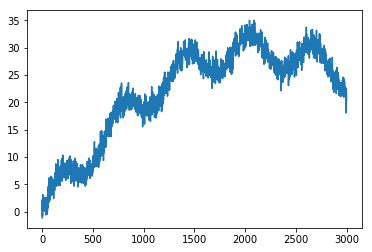

In [265]:
plt.plot(x)

In [256]:
yf = scipy.fftpack.fft(x)
N = len(x)
xf = np.linspace(0.0, 1.0/(2.0*dt), N/2)
P = 2.0/N * np.abs(yf[:N//2])

/home/caveman/BMD2/lib/python3.5/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


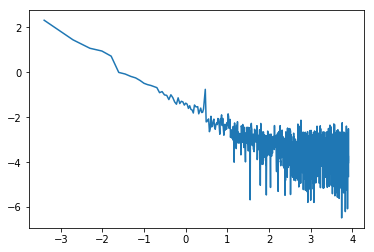

In [257]:
plt.plot(np.log(xf), np.log(P))

In [258]:
np.exp(0.5)

1.6487212707001282

In [259]:
dt

0.01

In [279]:
freq = 0.1

In [280]:
gamma = np.exp(-2.1*np.log(freq) - 1.6)
print(gamma)

25.417265705622988


In [281]:
params, v = pynumdiff.optimize.kalman_smooth.constant_acceleration(x, dt, tvgamma=gamma)
x_smooth, xdot_smooth = pynumdiff.kalman_smooth.constant_acceleration(x, dt, params)
print(params)

[0.11524658203124996, 8.409179687499999e-05]


In [282]:
np.sqrt(np.mean((xdot_smooth - dxdt_truth)**2))

4.355393563099165

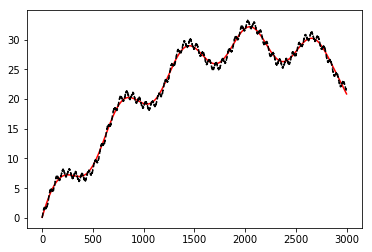

In [283]:
plt.plot(x_smooth, color='red')
plt.plot(x_truth, '--', color='black')

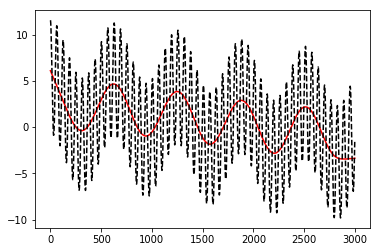

In [284]:
plt.plot(xdot_smooth, color='red')
plt.plot(dxdt_truth, '--', color='black')

In [273]:
gamma = np.exp(-1.2*np.log(freq) - 1.99)
params, v = pynumdiff.optimize.linear_model.savgoldiff(x, dt, tvgamma=gamma)
x_smooth, xdot_smooth = pynumdiff.linear_model.savgoldiff(x, dt, params)

/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is depre

In [274]:
np.sqrt(np.mean((xdot_smooth - dxdt_truth)**2))

4.323357859502318

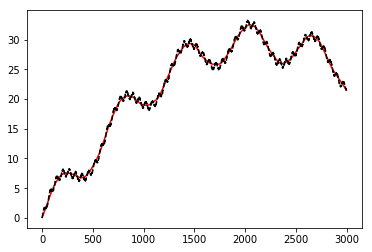

In [275]:
plt.plot(x_smooth, color='red')
plt.plot(x_truth, '--', color='black')

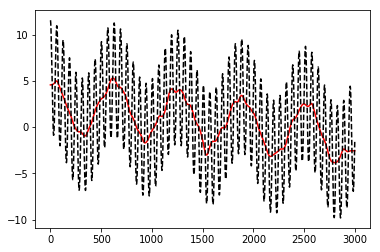

In [276]:
plt.plot(xdot_smooth, color='red')
plt.plot(dxdt_truth, '--', color='black')